In [1]:
import pygrib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np


gpv_file = pygrib.open(
    "../data/2018/Z__C_RJTD_20180915120000_EPSG_GPV_Rjp_Gll0p375deg_Lsurf_FD0000-3400_EM-13_grib2.bin"
)

In [2]:
# 降水量を抽出したいが、どうやって指定すれば良いのかよくわからんかった。
# 一般的にparameterNumber=8 (Total Precipitation)が降水量なので、とりあえずそれを抽出してみる(select)

gpv_file.seek(0)  # ファイルの参照位置を上まで戻す。
try:
    precip_msgs = gpv_file.select(parameterNumber=8)
    print(f"パラメーター指定で見つかったメッセージ数: {len(precip_msgs)}")
    if len(precip_msgs) > 0:
        print(precip_msgs[0])
except:
    print("パラメーター指定での取得に失敗しました")

パラメーター指定で見つかったメッセージ数: 3536
11:Total precipitation:kg m-2 (accum):regular_ll:surface:level 0:fcst time 0-3 hrs (accum):from 201809151200:hi res cntl fcst


In [3]:
# Total precipitationは恐らくparameterNameなので、これを指定して確実に抽出してみる。
# 若干冗長な処理

gpv_file.seek(0)
prcip_msg = gpv_file.select(parameterName="Total precipitation")
print(prcip_msg[0])
print(prcip_msg[-1])

11:Total precipitation:kg m-2 (accum):regular_ll:surface:level 0:fcst time 0-3 hrs (accum):from 201809151200:hi res cntl fcst
24828:Total precipitation:kg m-2 (accum):regular_ll:surface:level 0:fcst time 0-816 hrs (accum):from 201809151200:neg ens pert 6


In [4]:
# 上をみると、とりあえず、たぶん雨は抽出できている。
# あとはどうやってデータを取り扱うかを検討する。
# prcip_msgはリストなので、prcip_msp[12]とかで、そのインデックスのデータは取り出せる

print(type(prcip_msg))
print(prcip_msg[12])

<class 'list'>
95:Total precipitation:kg m-2 (accum):regular_ll:surface:level 0:fcst time 0-39 hrs (accum):from 201809151200:hi res cntl fcst


[[ 0.      0.      0.     ...  2.5625  2.4375  2.1875]
 [ 0.      0.      0.     ...  2.      1.75    1.5   ]
 [ 0.      0.      0.     ...  1.4375  1.375   1.25  ]
 ...
 [20.6875 14.875  14.6875 ... 19.3125 17.5625 14.3125]
 [35.625  19.5625 10.6875 ... 19.     17.5625 14.8125]
 [43.125  23.375   9.25   ... 18.625  18.0625 15.5   ]]


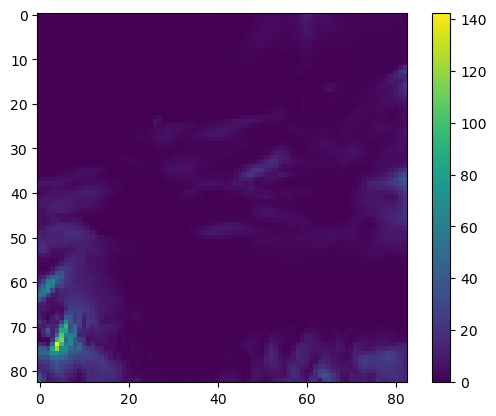

In [6]:
# .valuesメソッドで、降水量は取り出すことが可能。
# とりあえずクイックルック的に可視化してみよう。

print(prcip_msg[12].values)

plt.imshow(prcip_msg[12].values)
plt.colorbar()
plt.show()

In [16]:
# これで緯度経度が抽出できる。
prcip_msg[12].latlons()

(array([[50.25 , 50.25 , 50.25 , ..., 50.25 , 50.25 , 50.25 ],
        [49.875, 49.875, 49.875, ..., 49.875, 49.875, 49.875],
        [49.5  , 49.5  , 49.5  , ..., 49.5  , 49.5  , 49.5  ],
        ...,
        [20.25 , 20.25 , 20.25 , ..., 20.25 , 20.25 , 20.25 ],
        [19.875, 19.875, 19.875, ..., 19.875, 19.875, 19.875],
        [19.5  , 19.5  , 19.5  , ..., 19.5  , 19.5  , 19.5  ]]),
 array([[119.625, 120.   , 120.375, ..., 149.625, 150.   , 150.375],
        [119.625, 120.   , 120.375, ..., 149.625, 150.   , 150.375],
        [119.625, 120.   , 120.375, ..., 149.625, 150.   , 150.375],
        ...,
        [119.625, 120.   , 120.375, ..., 149.625, 150.   , 150.375],
        [119.625, 120.   , 120.375, ..., 149.625, 150.   , 150.375],
        [119.625, 120.   , 120.375, ..., 149.625, 150.   , 150.375]]))

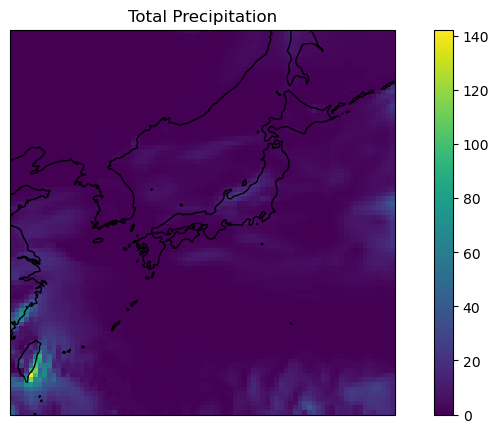

In [15]:
gpv_file.seek(0)

lat, lon = prcip_msg[12].latlons()

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
im = ax.pcolormesh(lon, lat, prcip_msg[12].values, transform=ccrs.PlateCarree())
plt.colorbar(im, ax=ax)
plt.title("Total Precipitation")
plt.show()

In [18]:
# 結局この値はなんなんだろう？
# 出力を見ると、なんか時間の情報とか、cntlとか、fcst timeとか書いてある。
prcip_msg[12]

95:Total precipitation:kg m-2 (accum):regular_ll:surface:level 0:fcst time 0-39 hrs (accum):from 201809151200:hi res cntl fcst

In [21]:
# 摂動の番号っぽい
# 恐らく13メンバーなので、+-6なのかな。
prcip_msg[12].perturbationNumber

0

In [26]:
# 実際何を取り出せるかはこうやって確認できるから、調べてみましょう。
# 抽出ができれば自動化ができるはず（今だと自力で探すしかないので）
prcip_msg[12].keys()

['globalDomain',
 'GRIBEditionNumber',
 'tablesVersionLatestOfficial',
 'tablesVersionLatest',
 'grib2divider',
 'angleSubdivisions',
 'missingValue',
 'ieeeFloats',
 'isHindcast',
 'section0Length',
 'identifier',
 'discipline',
 'editionNumber',
 'totalLength',
 'sectionNumber',
 'section1Length',
 'numberOfSection',
 'centre',
 'centreDescription',
 'subCentre',
 'tablesVersion',
 'masterDir',
 'localTablesVersion',
 'significanceOfReferenceTime',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'second',
 'dataDate',
 'julianDay',
 'dataTime',
 'productionStatusOfProcessedData',
 'typeOfProcessedData',
 'md5Section1',
 'selectStepTemplateInterval',
 'selectStepTemplateInstant',
 'stepType',
 'is_chemical',
 'is_chemical_distfn',
 'is_chemical_srcsink',
 'is_aerosol',
 'is_aerosol_optical',
 'setCalendarId',
 'deleteCalendarId',
 'sectionNumber',
 'grib2LocalSectionPresent',
 'deleteLocalDefinition',
 'sectionNumber',
 'gridDescriptionSectionPresent',
 'section3Length',
 'numberOfSec

In [27]:
# 必要な値を見つけるときは以下のようにselectを使おう。
# こんな感じで、積算時間とかも選択できると良いね。
gpv_file.seek(0)
gpv_file.select(parameterName="Total precipitation", perturbationNumber=6)

[21021:Total precipitation:kg m-2 (accum):regular_ll:surface:level 0:fcst time 0-3 hrs (accum):from 201809151200:pos ens pert 6,
 21028:Total precipitation:kg m-2 (accum):regular_ll:surface:level 0:fcst time 0-6 hrs (accum):from 201809151200:pos ens pert 6,
 21035:Total precipitation:kg m-2 (accum):regular_ll:surface:level 0:fcst time 0-9 hrs (accum):from 201809151200:pos ens pert 6,
 21042:Total precipitation:kg m-2 (accum):regular_ll:surface:level 0:fcst time 0-12 hrs (accum):from 201809151200:pos ens pert 6,
 21049:Total precipitation:kg m-2 (accum):regular_ll:surface:level 0:fcst time 0-15 hrs (accum):from 201809151200:pos ens pert 6,
 21056:Total precipitation:kg m-2 (accum):regular_ll:surface:level 0:fcst time 0-18 hrs (accum):from 201809151200:pos ens pert 6,
 21063:Total precipitation:kg m-2 (accum):regular_ll:surface:level 0:fcst time 0-21 hrs (accum):from 201809151200:pos ens pert 6,
 21070:Total precipitation:kg m-2 (accum):regular_ll:surface:level 0:fcst time 0-24 hrs (accu